In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
%matplotlib inline
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore

In [10]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy')


In [11]:
print(U.shape)
print(V.shape)

(10103, 150)
(5880, 150)


In [12]:
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


(10103, 5880)


(1431,)
[[-0.6698657  -0.636876   -0.515051   ... -0.787012   -0.5744905
  -0.71434593]
 [-0.6050052  -0.7082599  -0.62539995 ... -0.87212145 -0.79257673
  -0.89458376]
 [ 1.8372207  -0.40177548 -0.54954284 ... -0.4324063  -0.40221697
  -0.492805  ]
 ...
 [ 0.59666324 -0.7475455   0.82914644 ...  1.0056405  -0.8163344
   0.53746325]
 [-0.39192972 -0.59896755 -0.7383391  ... -1.0460246   0.15649427
  -0.34880286]
 [ 0.51512265 -0.70892954  2.9017665  ... -0.84788203 -0.9632763
  -1.1472687 ]]
(array([    2,     3,     9, ..., 10091, 10099, 10100]),)


(array([ 288., 5276., 3412.,  650.,  178.,   70.,   14.,    6.,    0.,
           6.]),
 array([-0.05498524, -0.00659377,  0.0417977 ,  0.09018917,  0.13858064,
         0.18697211,  0.23536358,  0.28375505,  0.33214652,  0.38053799,
         0.42892946]),
 <a list of 10 Patch objects>)

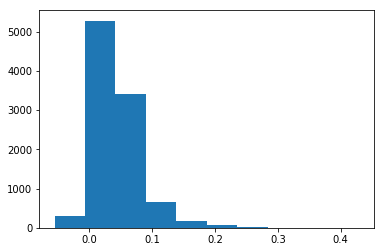

In [13]:
neurons=np.nonzero(U[:,0])
print(neurons[0].shape)
ensemble_X=X[neurons,:][0]
print(ensemble_X)
print(neurons)
#for j in range(0,10):
    #plt.plot(ensemble_X[j,0:200])
    #plt.show()

corr_lst=[]
for i in range(0,100):
    for j in range(0,100):
        if j!=i:
            #print(j,i)
            corr_lst.append(np.corrcoef(ensemble_X[j,:],ensemble_X[i,:])[0,1])
#print(corr_lst)
plt.hist(corr_lst)